In [90]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import json
np.random.seed(0)
ROOT = Path("")

In [248]:
model_list_path = Path("/netscratch2/jlautz/model_robustness/src/model_robustness/data/sparsified/MNIST/PGD/hyp-10-r")
with open(os.path.join(model_list_path, 'model_list.txt'), "r") as items:
    model_paths = items.readlines()

    for i, l in enumerate(model_paths):
        model_paths[i] = l.replace("\n", "")

In [250]:
checkpoint_path = os.path.join(ROOT, "/ds2/model_zoos/zoos_sparsified/distillation/zoos/MNIST/ARD/cnn_small_mnist_rand_ard")

for i, path in enumerate(model_paths):

    # Read in config containing the paramters for the i-th model
    model_config_path = os.path.join(checkpoint_path, path, "params.json")
    config_model = json.load(open(model_config_path, ))
    
    checkpoints = []
    for p in os.listdir(os.path.join(checkpoint_path, path)):
        if p.startswith("checkpoint"):
            checkpoints.append(p)
        checkpoints.sort()
    
    best_acc = 0
    index = None
    for l, line in enumerate(open(os.path.join(checkpoint_path, path, "result.json"), "r")):
        aux_dict = json.loads(line)
        if aux_dict["test_acc"] > best_acc:
            best_acc = aux_dict["test_acc"]
            index = l
    checkpoint = checkpoints[index]
    print(checkpoint, best_acc)


checkpoint_000001 0.9805
checkpoint_000001 0.9606
checkpoint_000001 0.9564
checkpoint_000000 0.9716
checkpoint_000000 0.1135
checkpoint_000000 0.9811
checkpoint_000000 0.9629
checkpoint_000011 0.2141
checkpoint_000000 0.9506
checkpoint_000000 0.9856
checkpoint_000000 0.9719
checkpoint_000001 0.9664
checkpoint_000000 0.1135
checkpoint_000000 0.9747
checkpoint_000000 0.1135
checkpoint_000000 0.1135
checkpoint_000001 0.7254
checkpoint_000001 0.9777
checkpoint_000001 0.9223
checkpoint_000000 0.9855
checkpoint_000000 0.9787
checkpoint_000001 0.9773
checkpoint_000001 0.8637
checkpoint_000024 0.1135
checkpoint_000000 0.9409
checkpoint_000001 0.9832
checkpoint_000000 0.9538
checkpoint_000001 0.9143
checkpoint_000001 0.9836
checkpoint_000000 0.985
checkpoint_000001 0.9703
checkpoint_000000 0.9816
checkpoint_000005 0.8238
checkpoint_000001 0.86
checkpoint_000000 0.9624
checkpoint_000000 0.9804
checkpoint_000001 0.9818
checkpoint_000000 0.9627
checkpoint_000000 0.7938
checkpoint_000000 0.9824
che

In [159]:
# df = pd.read_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/data/resnet/all_results_resnet_df.csv")
data = pd.read_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/data/all_results.csv", index_col=0)

In [224]:
config = {}
config["dropout"] = 0.0
config["init_type"] = "kaiming_normal"
config["nlin"] = "tanh"
config["optimizer"] = "sgd"
config["lr"] = 0.001
config["wd"] = 0.001


df_root = data[
    (data.dataset=="CIFAR10") \
    & (data.attack=="PGD") \
    & (data.setup=="hyp-10-f") \
    & (data.eps==0.1) \
    & (data.lr==config["lr"]) \
    & (data.wd==config["wd"])]

# Get best model
df = df_root[(df_root.dropout==config["dropout"]) \
    & (df_root.init_type==config["init_type"]) \
    & (df_root.nlin==config["nlin"]) \
    & (df_root.optimizer==config["optimizer"])]

df_best = df.sort_values(by="old_acc", ascending=False).reset_index(drop=True)

In [225]:
scenario_paths = {
    "dropout": None,
}
config["dataset"] = "CIFAR10"
scenario_paths = {
    "dropout": None,
    "nlin": None,
    "init_type": None,
    "optimizer": None
}

# Scenario 1: different dropout
aux_df = df_root[(df_root.nlin==config["nlin"]) \
    & (df_root.optimizer==config["optimizer"]) \
    & (df_root.init_type==config["init_type"])]
aux_list = []
for k in aux_df.dropout.value_counts().keys():
    if k == config["dropout"]:
        continue
    temp_df = aux_df[aux_df.dropout==k].sort_values(by="old_acc", ascending=False).reset_index(drop=True)
    aux_dict = {k: temp_df.loc[0, "name"]}
    aux_list.append(aux_dict)
scenario_paths["dropout"] = aux_list

# Scenario 2: different nlin
aux_df = df_root[(df_root.dropout==config["dropout"]) \
    & (df_root.optimizer==config["optimizer"]) \
    & (df_root.init_type==config["init_type"])]
aux_list = []
for k in aux_df.nlin.value_counts().keys():
    if k == config["nlin"]:
        continue
    temp_df = aux_df[aux_df.nlin==k].sort_values(by="old_acc", ascending=False).reset_index(drop=True)
    aux_dict = {k: temp_df.loc[0, "name"]}
    aux_list.append(aux_dict)
scenario_paths["nlin"] = aux_list

# Scenario 3: different init type
aux_df = df_root[(df_root.nlin==config["nlin"]) \
    & (df_root.optimizer==config["optimizer"]) \
    & (df_root.dropout==config["dropout"])]
aux_list = []
for k in aux_df.init_type.value_counts().keys():
    if k == config["init_type"]:
        continue
    temp_df = aux_df[aux_df.init_type==k].sort_values(by="old_acc", ascending=False).reset_index(drop=True)
    aux_dict = {k: temp_df.loc[0, "name"]}
    aux_list.append(aux_dict)
scenario_paths["init_type"] = aux_list

# Scenario 4: different optimizer
if config["dataset"] == "SVHN":
    pass
else:
    aux_df = df_root[(df_root.nlin==config["nlin"]) \
        & (df_root.init_type==config["init_type"]) \
        & (df_root.dropout==config["dropout"])]
    aux_list = []
    for k in aux_df.optimizer.value_counts().keys():
        if k == config["optimizer"]:
            continue
        temp_df = aux_df[aux_df.optimizer==k].sort_values(by="old_acc", ascending=False).reset_index(drop=True)
        aux_dict = {k: temp_df.loc[0, "name"]}
        aux_list.append(aux_dict)
    scenario_paths["optimizer"] = aux_list

In [226]:
scenario_paths

{'dropout': [{0.5: 'NN_tune_trainable_143c9_00999_999_model::dropout=0.5,model::init_type=kaiming_normal,model::nlin=tanh,optim::optimizer=sgd,optim::_2021-09-24_11-43-43'}],
 'nlin': [{'gelu': 'NN_tune_trainable_143c9_01022_1022_model::dropout=0,model::init_type=kaiming_normal,model::nlin=gelu,optim::optimizer=sgd,optim::w_2021-09-24_12-33-07'},
  {'relu': 'NN_tune_trainable_143c9_01134_1134_model::dropout=0,model::init_type=kaiming_normal,model::nlin=relu,optim::optimizer=sgd,optim::w_2021-09-24_18-29-01'},
  {'sigmoid': 'NN_tune_trainable_143c9_00502_502_model::dropout=0,model::init_type=kaiming_normal,model::nlin=sigmoid,optim::optimizer=sgd,optim:_2021-09-23_10-52-55'}],
 'init_type': [{'kaiming_uniform': 'NN_tune_trainable_143c9_01124_1124_model::dropout=0,model::init_type=kaiming_uniform,model::nlin=tanh,optim::optimizer=sgd,optim::_2021-09-24_18-03-26'},
  {'uniform': 'NN_tune_trainable_143c9_01248_1248_model::dropout=0,model::init_type=uniform,model::nlin=tanh,optim::optimizer

In [209]:
df

,scenarios,MNIST,CIFAR10,SVHN
0,normal,0.9840,0.6680,0.829000
1,white_box,0.2337,0.1913,0.049900
2,black_box_1,0.1351,0.2012,0.242548
3,black_box_2,0.9709,0.2598,0.230524
4,black_box_3,0.7082,0.2872,0.154541
5,black_box_4,0.3999,0.2337,NaN
6,black_box_5,NaN,NaN,NaN


In [239]:
scenario_list = []
for i, category in enumerate(scenario_paths):
    for j, param in enumerate(scenario_paths[category]):
        scenario_list.append(f"{category}_{next(iter(param))}")
        for k in param:
            print(param[k])

NN_tune_trainable_143c9_00999_999_model::dropout=0.5,model::init_type=kaiming_normal,model::nlin=tanh,optim::optimizer=sgd,optim::_2021-09-24_11-43-43
NN_tune_trainable_143c9_01022_1022_model::dropout=0,model::init_type=kaiming_normal,model::nlin=gelu,optim::optimizer=sgd,optim::w_2021-09-24_12-33-07
NN_tune_trainable_143c9_01134_1134_model::dropout=0,model::init_type=kaiming_normal,model::nlin=relu,optim::optimizer=sgd,optim::w_2021-09-24_18-29-01
NN_tune_trainable_143c9_00502_502_model::dropout=0,model::init_type=kaiming_normal,model::nlin=sigmoid,optim::optimizer=sgd,optim:_2021-09-23_10-52-55
NN_tune_trainable_143c9_01124_1124_model::dropout=0,model::init_type=kaiming_uniform,model::nlin=tanh,optim::optimizer=sgd,optim::_2021-09-24_18-03-26
NN_tune_trainable_143c9_01248_1248_model::dropout=0,model::init_type=uniform,model::nlin=tanh,optim::optimizer=sgd,optim::wd=0.001_2021-09-24_23-57-24
NN_tune_trainable_143c9_00098_98_model::dropout=0,model::init_type=normal,model::nlin=tanh,opt

In [241]:
df = pd.read_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/results/transferability/MNIST_results.csv", index_col=0)
df

,MNIST,scenarios
0,0.9840,normal
1,0.2337,white_box
2,0.1351,dropout_0.5
3,0.9462,nlin_relu
4,0.9709,nlin_gelu
5,0.6681,nlin_sigmoid
6,0.6022,init_type_kaiming_uniform
7,0.7082,init_type_normal
8,0.7051,init_type_uniform
9,0.3999,optimizer_sgd


In [242]:
df = pd.read_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/results/transferability/CIFAR10_results.csv", index_col=0)
df

,CIFAR10,scenarios
0,0.6680,normal
1,0.1896,white_box
2,0.2009,dropout_0.5
3,0.2589,nlin_gelu
4,0.2536,nlin_relu
5,0.2766,nlin_sigmoid
6,0.2874,init_type_uniform
7,0.2821,init_type_normal
8,0.2503,init_type_kaiming_uniform
9,0.2306,optimizer_sgd


In [243]:
df = pd.read_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/results/transferability/SVHN_results.csv", index_col=0)
df

,SVHN,scenarios
0,0.829000,normal
1,0.049900,white_box
2,0.244545,dropout_0.5
3,0.242548,dropout_0.3
4,0.198026,nlin_sigmoid
5,0.230524,nlin_relu
6,0.214121,nlin_gelu
7,0.154541,init_type_kaiming_uniform
8,0.159803,init_type_uniform
9,0.206553,init_type_normal


In [203]:
df.sort_values(by="old_acc", ascending=False).reset_index(drop=True).loc[0, "name"]

'NN_tune_trainable_b6a12_01798_1798_model::dropout=0.0,model::init_type=kaiming_normal,model::nlin=tanh,optim::lr=0.001,optim::opti_2021-07-13_11-29-31'

In [181]:
df = data[data.dataset == "SVHN"]
df = df[df.attack == "PGD"]
df = df[df.setup == "hyp-10-f"]
df = df[df.eps == 0.1]

In [184]:
df = df[(df.init_type=="kaiming_normal")&(df.nlin=="tanh")&(df.optimizer=="sgd")&(df.dropout==0.0)&(df.wd==0.001)&(df.lr==0.001)]

In [185]:
df.sort_values(by="old_acc", ascending=False)

,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
121979,NN_tune_trainable_88eea_02361_2361_model::drop...,SVHN,PGD,hyp-10-f,0.1,0.0,kaiming_normal,tanh,0.001,0.9,sgd,0.001,6,0.557,0.829,0.171390,0.481907
119338,NN_tune_trainable_88eea_03225_3225_model::drop...,SVHN,PGD,hyp-10-f,0.1,0.0,kaiming_normal,tanh,0.001,0.9,sgd,0.001,8,0.585,0.822,0.171680,0.480716
121346,NN_tune_trainable_88eea_03657_3657_model::drop...,SVHN,PGD,hyp-10-f,0.1,0.0,kaiming_normal,tanh,0.001,0.9,sgd,0.001,9,0.581,0.822,0.190223,0.475761
120913,NN_tune_trainable_88eea_01929_1929_model::drop...,SVHN,PGD,hyp-10-f,0.1,0.0,kaiming_normal,tanh,0.001,0.9,sgd,0.001,5,0.586,0.821,0.196493,0.464198
119159,NN_tune_trainable_88eea_01497_1497_model::drop...,SVHN,PGD,hyp-10-f,0.1,0.0,kaiming_normal,tanh,0.001,0.9,sgd,0.001,4,0.603,0.817,0.183864,0.477297
119167,NN_tune_trainable_88eea_00201_201_model::dropo...,SVHN,PGD,hyp-10-f,0.1,0.0,kaiming_normal,tanh,0.001,0.9,sgd,0.001,1,0.607,0.816,0.193246,0.474915
119352,NN_tune_trainable_88eea_00633_633_model::dropo...,SVHN,PGD,hyp-10-f,0.1,0.0,kaiming_normal,tanh,0.001,0.9,sgd,0.001,2,0.594,0.816,0.185029,0.473187
122198,NN_tune_trainable_88eea_04089_4089_model::drop...,SVHN,PGD,hyp-10-f,0.1,0.0,kaiming_normal,tanh,0.001,0.9,sgd,0.001,10,0.610,0.813,0.180352,0.476529
122210,NN_tune_trainable_88eea_02793_2793_model::drop...,SVHN,PGD,hyp-10-f,0.1,0.0,kaiming_normal,tanh,0.001,0.9,sgd,0.001,7,0.605,0.812,0.188703,0.469153
122127,NN_tune_trainable_88eea_01065_1065_model::drop...,SVHN,PGD,hyp-10-f,0.1,0.0,kaiming_normal,tanh,0.001,0.9,sgd,0.001,3,0.625,0.809,0.176173,0.472495


In [162]:
df.sort_values(by="old_acc", ascending=False)

,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
25859,NN_tune_trainable_c7016_00966_966_model::dropo...,CIFAR10,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,559684,0.975,0.663,0.247489,0.2733
26342,NN_tune_trainable_c7016_00454_454_model::dropo...,CIFAR10,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,884685,0.981,0.662,0.264728,0.2623
25877,NN_tune_trainable_c7016_00838_838_model::dropo...,CIFAR10,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,287676,0.977,0.660,0.219292,0.3011
26028,NN_tune_trainable_c7016_00070_70_model::dropou...,CIFAR10,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,107047,0.989,0.658,0.240400,0.2773
26274,NN_tune_trainable_c7016_00198_198_model::dropo...,CIFAR10,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,379171,1.010,0.654,0.259924,0.2655
26152,NN_tune_trainable_c7016_00326_326_model::dropo...,CIFAR10,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,68973,1.000,0.653,0.240777,0.2949
26637,NN_tune_trainable_c7016_01222_1222_model::drop...,CIFAR10,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,141385,0.996,0.653,0.254228,0.2653
26648,NN_tune_trainable_c7016_00710_710_model::dropo...,CIFAR10,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,794182,1.022,0.648,0.245086,0.2654
26329,NN_tune_trainable_c7016_00582_582_model::dropo...,CIFAR10,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,810893,1.023,0.644,0.266891,0.2424
26160,NN_tune_trainable_c7016_01094_1094_model::drop...,CIFAR10,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,206540,1.038,0.641,0.246542,0.2685


In [158]:
df.sort_values(by="old_acc", ascending=False)

,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
1636,NN_tune_trainable_a17ed_01286_1286_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,513155,0.055,0.985,0.189847,0.4415
403,NN_tune_trainable_a17ed_02054_2054_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,145202,0.057,0.984,0.207533,0.4475
1000,NN_tune_trainable_a17ed_01798_1798_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,46510,0.057,0.984,0.091430,0.7074
1476,NN_tune_trainable_a17ed_00518_518_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,700507,0.063,0.983,0.060444,0.7935
204,NN_tune_trainable_a17ed_02310_2310_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,237916,0.060,0.982,0.158743,0.4583
30,NN_tune_trainable_a17ed_00006_6_model::dropout...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,341375,0.063,0.981,0.129428,0.5697
1906,NN_tune_trainable_a17ed_01542_1542_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,344397,0.062,0.981,0.139959,0.5939
2130,NN_tune_trainable_a17ed_00262_262_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,215708,0.066,0.981,0.071702,0.7411
2051,NN_tune_trainable_a17ed_00774_774_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,154314,0.070,0.979,0.147169,0.5274
1649,NN_tune_trainable_a17ed_01030_1030_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.001,0.9,adam,0.001,781029,0.069,0.978,0.085656,0.6926


In [8]:
df[df.name==l[0]].iloc[0,1]

'CIFAR10'

<Axes: >

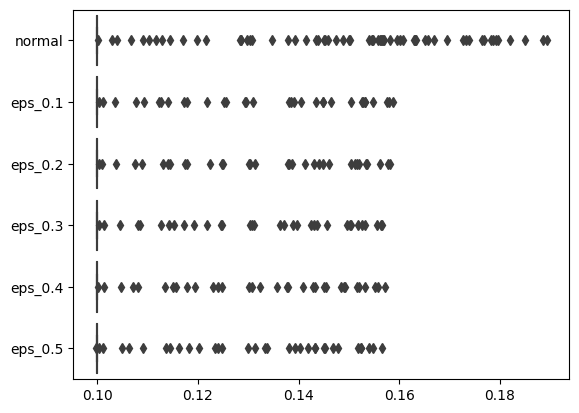

In [6]:
eps = [.1, .2, .3, .4, .5]

aux_df = df[(df.dataset == "CIFAR10") & (df.attack == "PGD") & (df.setup == "hyp-10-r")]
both_results = pd.DataFrame()

for i, e in enumerate(eps):

    eps_df = aux_df[aux_df.eps == e].sort_values(by="name").reset_index(drop=True)

    both_results["normal"] = eps_df["old_acc"]
    both_results[f"eps_{e}"] = eps_df["new_acc"]

# sns.displot(data=both_results[["normal", "eps_0.1"]], kde=True)
sns.boxplot(both_results, orient="h")

In [8]:
both_results.normal.value_counts()

0.1000    1143
0.1546       1
0.1144       1
0.1651       1
0.1564       1
          ... 
0.1631       1
0.1285       1
0.1632       1
0.1582       1
0.1283       1
Name: normal, Length: 67, dtype: int64

In [8]:
df.new_acc.value_counts()

0.195874    58607
0.100000    33482
0.113500    22837
0.066994     6284
0.097400     4077
            ...  
0.338500        1
0.716200        1
0.479900        1
0.228800        1
0.133835        1
Name: new_acc, Length: 13536, dtype: int64

In [27]:
df[df.old_acc=="(0.92,)"]

,name,dataset,attack,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
15,NN_tune_trainable_0ecbc_00980_980_seed=981_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,981,0.303,"(0.92,)",0.019619,0.2724
21,NN_tune_trainable_0ecbc_00321_321_seed=322_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,322,0.308,"(0.92,)",0.018843,0.2733
73,NN_tune_trainable_0ecbc_00380_380_seed=381_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,381,0.309,"(0.92,)",0.018729,0.2670
74,NN_tune_trainable_0ecbc_00118_118_seed=119_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,119,0.311,"(0.92,)",0.020664,0.2544
115,NN_tune_trainable_0ecbc_00488_488_seed=489_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,489,0.303,"(0.92,)",0.020058,0.2585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9811,NN_tune_trainable_0ecbc_00118_118_seed=119_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,119,0.311,"(0.92,)",0.021218,0.2081
9812,NN_tune_trainable_0ecbc_00380_380_seed=381_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,381,0.309,"(0.92,)",0.019995,0.2226
9839,NN_tune_trainable_0ecbc_00321_321_seed=322_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,322,0.308,"(0.92,)",0.020388,0.2267
9863,NN_tune_trainable_0ecbc_00980_980_seed=981_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,981,0.303,"(0.92,)",0.019261,0.2319


In [29]:
df[df.old_acc=="(0.92,)"].iloc[0, 13]

AttributeError: 'str' object has no attribute 'dtype'

In [40]:
s = '0.7,'
s[:-1]

'0.7'

In [36]:
for i in range(len(df)):
    if isinstance(df.loc[i, "old_acc"], str):
        if df.loc[i, "old_acc"].startswith("("):
            df.loc[i, "old_acc"] = df.loc[i, "old_acc"][1:5]

In [41]:
for i in range(len(df)):
    if isinstance(df.loc[i, "old_acc"], str):
        if df.loc[i, "old_acc"].endswith(","):
            df.loc[i, "old_acc"] = df.loc[i, "old_acc"][:-1]

In [43]:
df = df.astype({"old_acc": "float64"})

In [44]:
df.to_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/data/resnet/all_results_resnet_df.csv", index=False)
        

In [49]:
def return_names_for_path(dataset, setup):
    if dataset=="CIFAR10":
        size = "large"
    else:
        size = "small"
    
    if setup == "seed":
        zoo_p = f"cnn_{size}_{dataset.lower()}_ard"
    elif setup == "hyp-10-f":
        zoo_p = f"cnn_{size}_{dataset.lower()}_fixed_ard"
    else: 
        zoo_p = f"cnn_{size}_{dataset.lower()}_rand_ard"

    return zoo_p

In [50]:
results_root = os.path.join(ROOT, "/netscratch2/jlautz/model_robustness/src/model_robustness/data/resnet")

In [51]:
df = pd.read_csv(os.path.join(results_root, "all_results_resnet_df.csv"))

In [70]:
kendall_df = pd.DataFrame(columns=["ds", "attack", "kendalls_tau", "p-value"])
datasets = ["CIFAR10", "CIFAR100", "TinyImageNet"]
for i, ds in enumerate(datasets):
    
    aux_df = df[(df.dataset==ds) & (df.attack=="PGD") & (df.eps==0.1)]
    aux_df[["name", "old_acc", "new_acc"]]
    
    perturbed_df = aux_df.sort_values("new_acc", ascending=False)
    aux_df = aux_df.sort_values("old_acc", ascending=False)
    
    perturbed_df.insert(0, "order", range(1, 1+len(perturbed_df)))
    aux_df.insert(0, "order", range(1, 1+len(aux_df)))
    
    # Sort perturbed_df according to names of aux_df again
    aux_list = list(aux_df.name)
    perturbed_df.sort_values(by="name", key=lambda column:column.map(lambda e: aux_list.index(e)), inplace=True)

    
    # Calculating kendall's tau
    tau, p_value = stats.kendalltau(aux_df["order"], perturbed_df["order"])
    print(f"Tau-value: {tau}, p-value: {p_value}")
    kendall_df.loc[i, "ds"] = ds
    kendall_df.loc[i, "attack"] = "PGD"
    kendall_df.loc[i, "kendalls_tau"] = tau
    kendall_df.loc[i, "p-value"] = p_value

Tau-value: -0.04207007007007007, p-value: 0.04636315021175537
Tau-value: 0.0042922922922922924, p-value: 0.8389430917356812
Tau-value: 0.012272563546884298, p-value: 0.5605695208691802


In [71]:
kendall_df

,ds,attack,kendalls_tau,p-value
0,CIFAR10,PGD,-0.04207,0.046363
1,CIFAR100,PGD,0.004292,0.838943
2,TinyImageNet,PGD,0.012273,0.56057


In [69]:
aux_df.head()

,order,name,dataset,attack,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
572,1,NN_tune_trainable_0ecbc_00676_676_seed=677_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,677,0.291,0.926,0.019661,0.2603
403,2,NN_tune_trainable_0ecbc_00493_493_seed=494_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,494,0.295,0.926,0.019534,0.2625
846,3,NN_tune_trainable_0ecbc_00792_792_seed=793_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,793,0.297,0.926,0.020993,0.2485
22,4,NN_tune_trainable_0ecbc_00039_39_seed=40_2022-...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,40,0.306,0.926,0.020406,0.2677
577,5,NN_tune_trainable_0ecbc_00388_388_seed=389_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,389,0.300,0.925,0.019300,0.2778


In [18]:
df = pd.read_csv("../../results/transferability/dataframes/CIFAR10_hyp-10-f_df.csv", index_col=0)

In [19]:
df

,acc_avg,loss_avg,n_models,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,trial_id,experiment_id,...,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,warmup_time,config/best_model_path,config/checkpoint_path,config/experiment,config/path_list,logdir
0,0.702300,0.087755,1,2.882510,False,NaN,NaN,1,1ecf5_00000,72b01bd5628b4e5f8a825623f317a0cf,...,172.17.0.3,2.882510,0,1,0.009224,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,normal,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...
1,0.225200,0.251128,1,2.449597,False,NaN,NaN,1,1ecf5_00001,72b01bd5628b4e5f8a825623f317a0cf,...,172.17.0.3,2.449597,0,1,0.009224,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,white_box,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...
2,0.138555,0.226433,20,36.225797,False,NaN,NaN,1,1ecf5_00002,72b01bd5628b4e5f8a825623f317a0cf,...,172.17.0.3,36.225797,0,1,0.009224,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,black_box_1,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...
3,0.214815,0.208114,20,37.351231,False,NaN,NaN,1,1ecf5_00003,72b01bd5628b4e5f8a825623f317a0cf,...,172.17.0.3,37.351231,0,1,0.009224,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,black_box_2,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...
4,0.234942,85596.933761,60,106.997857,False,NaN,NaN,1,1ecf5_00005,808eba129f6c444d9517795c40679422,...,172.17.0.3,106.997857,0,1,0.010045,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,black_box_4,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...
5,0.234262,6025.888139,60,107.137619,False,NaN,NaN,1,1ecf5_00006,808eba129f6c444d9517795c40679422,...,172.17.0.3,107.137619,0,1,0.010045,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,black_box_5,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...


In [20]:
l = []
for p in os.listdir("../../results/transferability/dataframes"):
    l.append(p)

In [21]:
l

['CIFAR10_hyp-10-r_df.csv',
 'CIFAR10_seed_df.csv',
 'MNIST_hyp-10-f_df.csv',
 'MNIST_seed_df.csv',
 'SVHN_hyp-10-r_df.csv',
 'SVHN_seed_df.csv',
 'SVHN_hyp-10-f_df.csv',
 'MNIST_hyp-10-r_df.csv',
 'CIFAR10_hyp-10-f_df.csv']

In [60]:
df = pd.read_csv(os.path.join("../../results/transferability/dataframes", l[6]), index_col=0)

In [61]:
df

,acc_avg,loss_avg,n_models,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,trial_id,experiment_id,...,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,warmup_time,config/best_model_path,config/checkpoint_path,config/experiment,config/path_list,logdir
0,0.852412,0.050289,1,5.117289,False,NaN,NaN,1,b232d_00000,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,5.117289,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,normal,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
1,0.046174,0.814661,1,4.660588,False,NaN,NaN,1,b232d_00001,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,4.660588,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,white_box,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
2,0.287052,0.213254,20,76.468439,False,NaN,NaN,1,b232d_00002,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,76.468439,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,black_box_1,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
3,0.235574,0.237216,20,80.181025,False,NaN,NaN,1,b232d_00003,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,80.181025,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,black_box_2,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
4,0.284306,0.234196,20,80.085954,False,NaN,NaN,1,b232d_00004,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,80.085954,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,black_box_3,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
5,0.223251,0.232795,30,118.115328,False,NaN,NaN,1,b232d_00005,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,118.115328,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,black_box_4,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
6,0.300898,0.244075,30,118.779482,False,NaN,NaN,1,b232d_00006,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,118.779482,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,black_box_5,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...


In [43]:
df.loc[0, "config/best_model_path"]

'NN_tune_trainable_40c41_01625_1625_model::dropout=0.5,model::init_type=normal,model::nlin=gelu,optim::lr=0.01,optim::wd=0.1,seed=5_2021-08-15_09-20-21'

In [76]:
import torch
zoo = torch.load("/ds2/model_zoos/zoos_resnet/zoos/CIFAR100/resnet18/kaiming_uniform/analysis.pt")

FileNotFoundError: [Errno 2] No such file or directory: '/ds2/model_zoos/zoos_resnet/zoos/CIFAR100/resnet18/kaiming_uniform/analysis.pt'

In [65]:
# Get only the results from the 50th epoch for each model
a = 0
index_list = [50]
path_list = []
for i in range(len(zoo["paths"])):
    if i == 0:
        aux = zoo["paths"][i]
        path_list.append(zoo["paths"][i])

    if zoo["paths"][i] == aux:
        pass
    else:
        a += 1
        index_list.append(i+50)
        aux = zoo["paths"][i]
        path_list.append(aux)

for i in range(len(path_list)):
    path_list[i] = path_list[i].__str__().split("/")[-1]

# Get all accuracies
acc_list = []
for index in index_list:
    acc_list.append(zoo["acc"][index])

# Get the index of max element
max_index = acc_list.index(max(acc_list))

# Get the corresponding model name
best_model_path = path_list[max_index]

In [66]:
acc_list.index(max(acc_list))

4029

In [74]:
acc_list[4030]

0.8510679164105716

In [70]:
path_list[4030]

'NN_tune_trainable_40c41_04098_4098_model::dropout=0.0,model::init_type=kaiming_uniform,model::nlin=relu,optim::lr=0.001,optim::wd=_2021-08-23_12-13-08'

In [71]:
len(acc_list)

4320

In [72]:
len(path_list)

4320

In [73]:
path_list[-10:]

['NN_tune_trainable_40c41_00549_549_model::dropout=0.0,model::init_type=kaiming_normal,model::nlin=relu,optim::lr=0.0001,optim::wd=0_2021-08-12_04-23-07',
 'NN_tune_trainable_40c41_01387_1387_model::dropout=0.3,model::init_type=kaiming_uniform,model::nlin=gelu,optim::lr=0.001,optim::wd=_2021-08-14_18-57-32',
 'NN_tune_trainable_40c41_01915_1915_model::dropout=0.3,model::init_type=kaiming_uniform,model::nlin=gelu,optim::lr=0.01,optim::wd=0_2021-08-16_06-50-37',
 'NN_tune_trainable_40c41_02824_2824_model::dropout=0.3,model::init_type=normal,model::nlin=gelu,optim::lr=0.001,optim::wd=0.001,see_2021-08-19_08-11-08',
 'NN_tune_trainable_40c41_01707_1707_model::dropout=0.0,model::init_type=normal,model::nlin=sigmoid,optim::lr=0.0001,optim::wd=0.1,s_2021-08-15_19-15-57',
 'NN_tune_trainable_40c41_00202_202_model::dropout=0.3,model::init_type=kaiming_normal,model::nlin=tanh,optim::lr=0.001,optim::wd=0._2021-08-11_00-16-45',
 'NN_tune_trainable_40c41_02266_2266_model::dropout=0.3,model::init_ty

In [92]:
path_list = []
max_index = None
best_model_path = None 
best_acc = 0.0
counter = 0

checkpoint_path = "/ds2/model_zoos/zoos_resnet/zoos/CIFAR10/resnet19/kaiming_uniform/tune_zoo_cifar10_resnet18_kaiming_uniform"
        
for d in os.listdir(checkpoint_path):
    if d.startswith("NN_tune_trainable"):
        path_list.append(d)
        checkpoints = []
        for p in os.listdir(os.path.join(checkpoint_path, d)):
            if p.startswith("checkpoint"):
                checkpoints.append(p)
        checkpoints.sort()

        for i, line in enumerate(open(os.path.join(checkpoint_path, d, "result.json"), "r")):
            if i == len(checkpoints)-1:
                aux_dic = json.loads(line)
                if aux_dic["test_acc"] > best_acc:
                    best_acc = aux_dic["test_acc"]
                    best_model_path = d
                    max_index = counter
        counter += 1
    break

In [96]:
df = pd.read_csv("../../data/all_results.csv", index_col=0)
df = df[(df.dataset=="MNIST") & (df.setup=="hyp-10-f") & (df.attack=="PGD") & (df.eps==0.1)]

In [99]:
model_paths=df["name"].tolist()
root_path="/ds2/model_zoos/zoos_v2/MNIST/tune_zoo_mnist_hyperparameter_10_fixed_seeds"

In [112]:
# Rank models according to the decreasing validation accuracy
# Iterate through the model_paths and get their validation accuracy
ranked = pd.DataFrame(columns=["name", "val_acc", "last_checkpoint"])
for k, path in enumerate(model_paths):
    # take last checkpoint
    checkpoints = []
    for p in os.listdir(os.path.join(root_path, path)):
        if p.startswith("checkpoint"):
            checkpoints.append(p)
    checkpoints.sort()
    for l, line in enumerate(open(os.path.join(root_path, path, "result.json"), "r")):

        if l == len(checkpoints)-1:
            aux_dic = json.loads(line)
            ranked.loc[k, "name"] = path
            ranked.loc[k, "val_acc"] = aux_dic["validation_acc"]
            ranked.loc[k, "last_checkpoint"] = checkpoints[-1]
ranked = ranked.sort_values(by="val_acc", ascending=False).reset_index()
ranked_model_paths = ranked["name"].tolist()
last_checkpoints = ranked["last_checkpoint"].tolist()

In [113]:
ranked

,index,name,val_acc,last_checkpoint
0,1952,NN_tune_trainable_b6a12_00094_94_model::dropou...,0.9855,checkpoint_000050
1,1962,NN_tune_trainable_b6a12_00024_24_model::dropou...,0.9844,checkpoint_000050
2,1585,NN_tune_trainable_b6a12_00540_540_model::dropo...,0.9844,checkpoint_000050
3,1437,NN_tune_trainable_b6a12_00014_14_model::dropou...,0.9842,checkpoint_000050
4,553,NN_tune_trainable_b6a12_00028_28_model::dropou...,0.9839,checkpoint_000050
...,...,...,...,...
2555,1517,NN_tune_trainable_b6a12_00977_977_model::dropo...,0.0964,checkpoint_000050
2556,1180,NN_tune_trainable_b6a12_00465_465_model::dropo...,0.0964,checkpoint_000050
2557,2360,NN_tune_trainable_b6a12_02296_2296_model::drop...,0.0875,checkpoint_000050
2558,148,NN_tune_trainable_b6a12_02168_2168_model::drop...,0.0875,checkpoint_000050


In [111]:
for l, line in enumerate(open(os.path.join(root_path, path, "result.json"), "r")):
    if l == len(checkpoints)-1:
        print(l)

50


In [135]:
# Checking sparsified accuracies for hyper zoos
df = pd.DataFrame(columns=["epoch_0", "epoch_1", "epoch_2", "epoch_5", "epoch_10", "epoch_15", "epoch_20", "epoch_25"])

root_path = Path("/ds2/model_zoos/zoos_sparsified/distillation/zoos/CIFAR10/ARD/cnn_large_cifar10_fixed_ard")
model_paths = []
for path in os.listdir(root_path):
    if not os.path.isfile(os.path.join(root_path, path)):
        model_paths.append(path)

In [136]:
len(model_paths)

1280

In [137]:
for j, path in enumerate(model_paths):
    for i, line in enumerate(open(os.path.join(root_path, path, "result.json"), "r")):
        if i == 0:
            aux_dic = json.loads(line)
            df.loc[j, "epoch_0"] = aux_dic["test_acc"]
        elif i == 1:
            aux_dic = json.loads(line)
            df.loc[j, "epoch_1"] = aux_dic["test_acc"]
        elif i == 2:
            aux_dic = json.loads(line)
            df.loc[j, "epoch_2"] = aux_dic["test_acc"]
        elif i == 5:
            aux_dic = json.loads(line)
            df.loc[j, "epoch_5"] = aux_dic["test_acc"]
        elif i == 10:
            aux_dic = json.loads(line)
            df.loc[j, "epoch_10"] = aux_dic["test_acc"]
        elif i == 15:
            aux_dic = json.loads(line)
            df.loc[j, "epoch_15"] = aux_dic["test_acc"]
        elif i==20:
            aux_dic = json.loads(line)
            df.loc[j, "epoch_20"] = aux_dic["test_acc"]
        elif i == 25:
            aux_dic = json.loads(line)
            df.loc[j, "epoch_25"] = aux_dic["test_acc"]

In [138]:
df

,epoch_0,epoch_1,epoch_2,epoch_5,epoch_10,epoch_15,epoch_20,epoch_25
0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,0.5652,0.5442,0.1551,0.1,0.1,0.1,0.1,0.1
2,0.6074,0.6081,0.4388,0.1,0.1,0.1,0.1,0.1
3,0.6101,0.5654,0.2064,0.1,0.1,0.1,0.1,0.1
4,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...
1275,0.4533,0.4365,0.169,0.1,0.1,0.1,0.1,0.1
1276,0.2008,0.1821,0.1,0.1,0.1,0.1,0.1,0.1
1277,0.6178,0.5979,0.1841,0.1592,0.1,0.1,0.1,0.1
1278,0.4421,0.4581,0.1,0.1,0.1,0.1,0.1,0.1


In [141]:
df["epoch_25"].value_counts()

0.1000    1143
0.1466       2
0.1711       2
0.1551       2
0.1145       2
          ... 
0.1020       1
0.1760       1
0.0996       1
0.1271       1
0.1100       1
Name: epoch_25, Length: 66, dtype: int64

<Axes: ylabel='Count'>

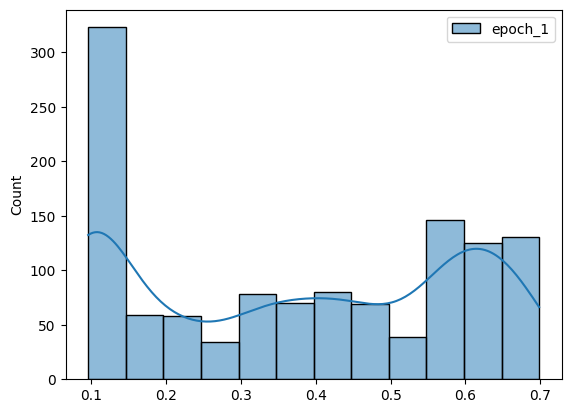

In [142]:
sns.histplot(data=df[["epoch_1"]], kde=True)